In [21]:
#Dependencies:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import json
import time
import pprint as pprint
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
from io import StringIO
import matplotlib
import plotly.plotly as py
import pprint as pprint
import plotly
plotly.tools.set_credentials_file(username='jatinku', api_key='MiyRiKB8B9iM1tI6wo0A')


In [2]:
# Name of the CSV file:
kaggle_file = "../Resources/universities.csv"
insti_file = "../Resources/cc_institution_details.csv"

In [3]:
#Reading the csv file:
uni_df = pd.read_csv(kaggle_file)
uni_df.head()

,Unnamed: 0,rankingNoteText,nonResponderText,nonResponder,act_avg,primaryPhoto,primaryPhotoThumb,sat_avg,enrollment,city,...,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey,univ_rank
0,1,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,...,national-universities,NaN,NaN,national-universities,1,private,NaN,ranked,2627,1.0
1,2,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,...,national-universities,NaN,NaN,national-universities,2,private,NaN,ranked,2155,2.0
2,3,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,...,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774,3.0
3,4,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,...,national-universities,NaN,NaN,national-universities,3,private,NaN,ranked,1426,3.0
4,5,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,...,national-universities,NaN,NaN,national-universities,5,private,NaN,ranked,2707,5.0


In [4]:
new_uni_df = uni_df[["displayName",
                    "city",
                    "state",
                    "rankingSortRank",
                    "act_avg",
                    "sat_avg",
                    "acceptance_rate",
                    "engineeringRepScore",
                    "businessRepScore",
                    "tuition"]]
new_uni_df.head()

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,NaN,47140
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,NaN,48949
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,NaN,NaN,54825
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,NaN,51400
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,NaN,57208


In [5]:
#Reading the csv file:
insti_df = pd.read_csv(insti_file, encoding="ISO-8859-1")
insti_df.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [6]:
# Creating new dataframe with only the needed data:
new_insti_df = insti_df[["chronname","control","grad_100_value","retain_value"]]
new_insti_df.head()

,chronname,control,grad_100_value,retain_value
0,Alabama A&M University,Public,10.0,63.1
1,University of Alabama at Birmingham,Public,29.4,80.2
2,Amridge University,Private not-for-profit,0.0,37.5
3,University of Alabama at Huntsville,Public,16.5,81.0
4,Alabama State University,Public,8.8,62.2


In [7]:
# Renamed the universities columns to match both Df's:
new_insti2 = new_insti_df.rename({"chronname": "displayName"}, axis=1)
new_insti2.head()

,displayName,control,grad_100_value,retain_value
0,Alabama A&M University,Public,10.0,63.1
1,University of Alabama at Birmingham,Public,29.4,80.2
2,Amridge University,Private not-for-profit,0.0,37.5
3,University of Alabama at Huntsville,Public,16.5,81.0
4,Alabama State University,Public,8.8,62.2


In [8]:
#Merge two dataframes using an inner join
merge_df = pd.merge(new_uni_df, new_insti2, on = "displayName")

In [9]:
merge_df.head()

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,NaN,47140,Private not-for-profit,87.8,97.6
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,NaN,48949,Private not-for-profit,86.5,97.1
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,NaN,NaN,54825,Private not-for-profit,87.9,99.3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,NaN,51400,Private not-for-profit,89.6,98.7
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,NaN,57208,Private not-for-profit,85.6,97.3


In [10]:
# Replacing the null values to zero:
merge_df["act_avg"] = merge_df["act_avg"].replace("NaN", np.nan).fillna(0)
merge_df["sat_avg"] = merge_df["sat_avg"].replace("NaN", np.nan).fillna(0)
merge_df["acceptance_rate"] = merge_df["acceptance_rate"].replace("NaN", np.nan).fillna(0)
merge_df["retain_value"] = merge_df["retain_value"].replace("NaN", np.nan).fillna(0)
merge_df["grad_100_value"] = merge_df["grad_100_value"].replace("NaN", np.nan).fillna(0)
merge_df["engineeringRepScore"] = merge_df["engineeringRepScore"].replace("NaN", np.nan).fillna(0)
merge_df["businessRepScore"] = merge_df["businessRepScore"].replace("NaN", np.nan).fillna(0)

In [11]:
merge_df.head(50)

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,0.0,47140,Private not-for-profit,87.8,97.6
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,0.0,48949,Private not-for-profit,86.5,97.1
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,0.0,0.0,54825,Private not-for-profit,87.9,99.3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,0.0,51400,Private not-for-profit,89.6,98.7
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,0.0,57208,Private not-for-profit,85.6,97.3
5,Massachusetts Institute of Technology,Cambridge,MA,5,33.0,1460.0,8.0,4.9,4.6,49892,Private not-for-profit,83.5,97.9
6,Stanford University,Stanford,CA,5,31.0,1380.0,5.0,4.8,0.0,49617,Private not-for-profit,76.1,98.6
7,University of Pennsylvania,Philadelphia,PA,8,32.0,1380.0,9.0,3.6,4.8,53534,Private not-for-profit,87.9,97.8
8,Duke University,Durham,NC,9,31.0,1380.0,11.0,3.7,0.0,53744,Private not-for-profit,87.1,97.2
9,California Institute of Technology,Pasadena,CA,10,34.0,1510.0,8.0,4.6,0.0,49908,Private not-for-profit,82.3,96.6


In [12]:
merge_df["sequence"]=range(1,1+len(merge_df))
merge_df.head(50)

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value,sequence
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,0.0,47140,Private not-for-profit,87.8,97.6,1
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,0.0,48949,Private not-for-profit,86.5,97.1,2
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,0.0,0.0,54825,Private not-for-profit,87.9,99.3,3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,0.0,51400,Private not-for-profit,89.6,98.7,4
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,0.0,57208,Private not-for-profit,85.6,97.3,5
5,Massachusetts Institute of Technology,Cambridge,MA,5,33.0,1460.0,8.0,4.9,4.6,49892,Private not-for-profit,83.5,97.9,6
6,Stanford University,Stanford,CA,5,31.0,1380.0,5.0,4.8,0.0,49617,Private not-for-profit,76.1,98.6,7
7,University of Pennsylvania,Philadelphia,PA,8,32.0,1380.0,9.0,3.6,4.8,53534,Private not-for-profit,87.9,97.8,8
8,Duke University,Durham,NC,9,31.0,1380.0,11.0,3.7,0.0,53744,Private not-for-profit,87.1,97.2,9
9,California Institute of Technology,Pasadena,CA,10,34.0,1510.0,8.0,4.6,0.0,49908,Private not-for-profit,82.3,96.6,10


In [13]:
merge_df = merge_df.head(80)
x = merge_df["sequence"]
y = merge_df["rankingSortRank"]
s = merge_df["tuition"]
lst = merge_df["control"]

In [14]:
def pltcolors(lst):
    cols=[]  
    for l in lst:
        if l == "Public":
            cols.append("gold")
        else:
            cols.append("lightblue")            
    return cols

cols = pltcolors(lst)  


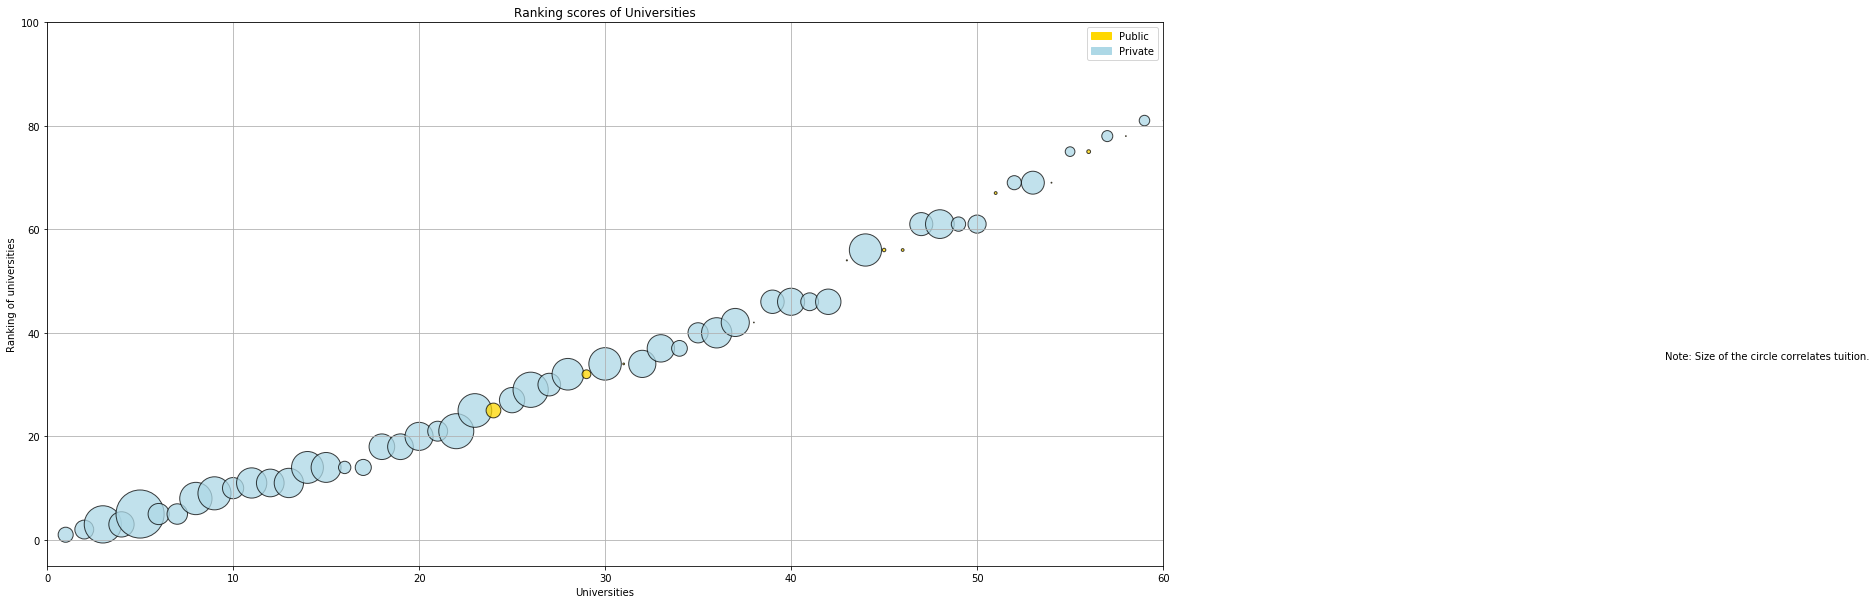

<Figure size 1440x720 with 0 Axes>

In [15]:
mpl.rcParams['figure.figsize'] = (20,10)
plt.scatter(x=x, y=y,s= (s/30000)**12, c=cols, edgecolors = "black", alpha =0.75)
plt.grid(axis="both")    
    
gold_patch = mpatches.Patch(color='gold', label='Public')
lightblue_patch = mpatches.Patch(color='lightblue', label='Private')
plt.legend(handles=[gold_patch, lightblue_patch])

plt.text(87,35,s="Note: Size of the circle correlates tuition.")
plt.xlim(0,60,5)
plt.ylim(-5,100,10)
plt.title("Ranking scores of Universities")
plt.xlabel("Universities")
plt.ylabel("Ranking of universities")
fig=plt.gcf()
plt.show()
plt.draw()
plt.savefig("tuitionVsranking.png")


In [16]:
#Creating a Newtable:
sat_act_df = merge_df[["sequence","sat_avg","act_avg"]]
sat_act_df.head()

,sequence,sat_avg,act_avg
0,1,1400.0,32.0
1,2,1430.0,32.0
2,3,1450.0,32.0
3,4,1420.0,32.0
4,5,1430.0,32.0


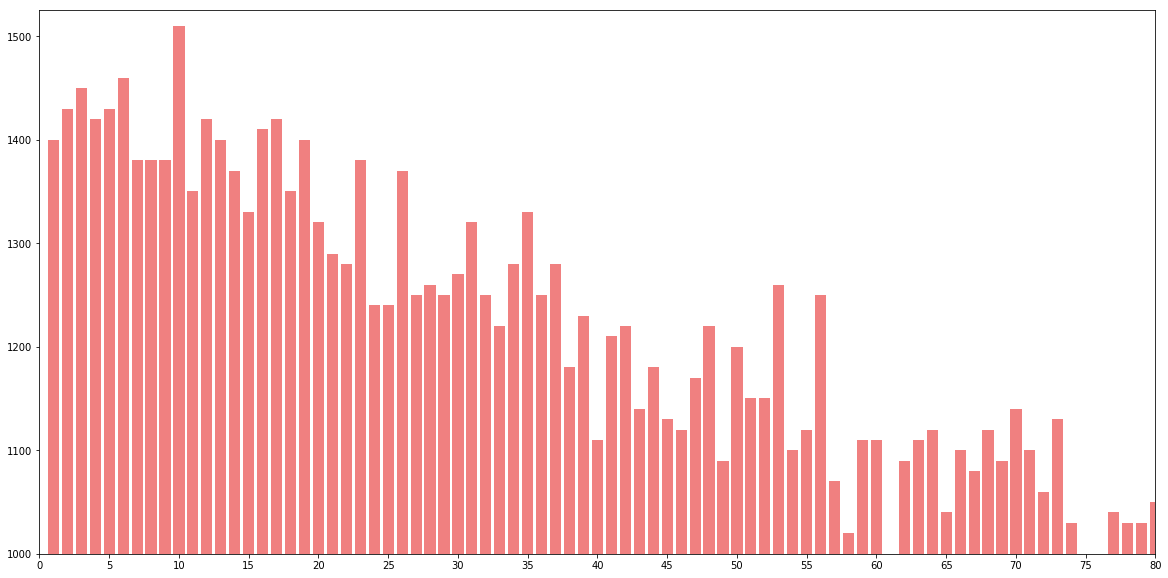

In [17]:
#Creating a bar chart for showing relationship of Ranking and 
x = merge_df["sequence"]
y = merge_df["sat_avg"]
#ax2 = ax.twin()


plt.ylim(1000,1525,100)
#tick_locations = [value for value in x]
plt.xlim(0, 80,5)
plt.xticks(np.arange(0,81,5))
plt.bar(x,y,color ="lightcoral", alpha=1,align="center")
plt.show()

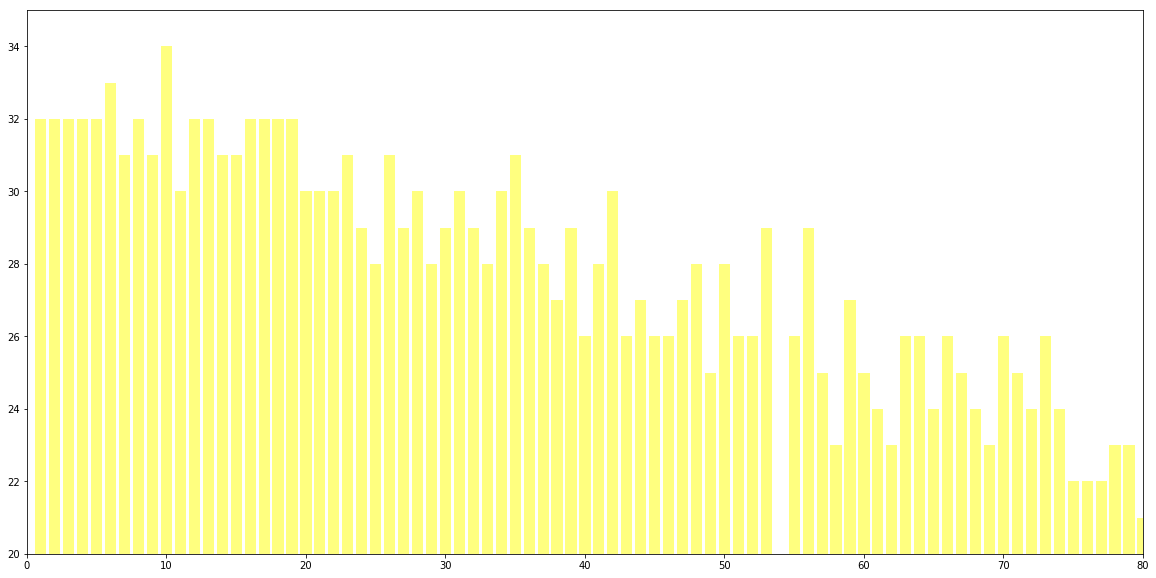

In [18]:
x -merge_df["sequence"]
y = merge_df["act_avg"]
plt.ylim(20,35,5)
plt.xlim(0, 80,5)
plt.bar(x,y,color ='yellow',alpha =0.5,align="center")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

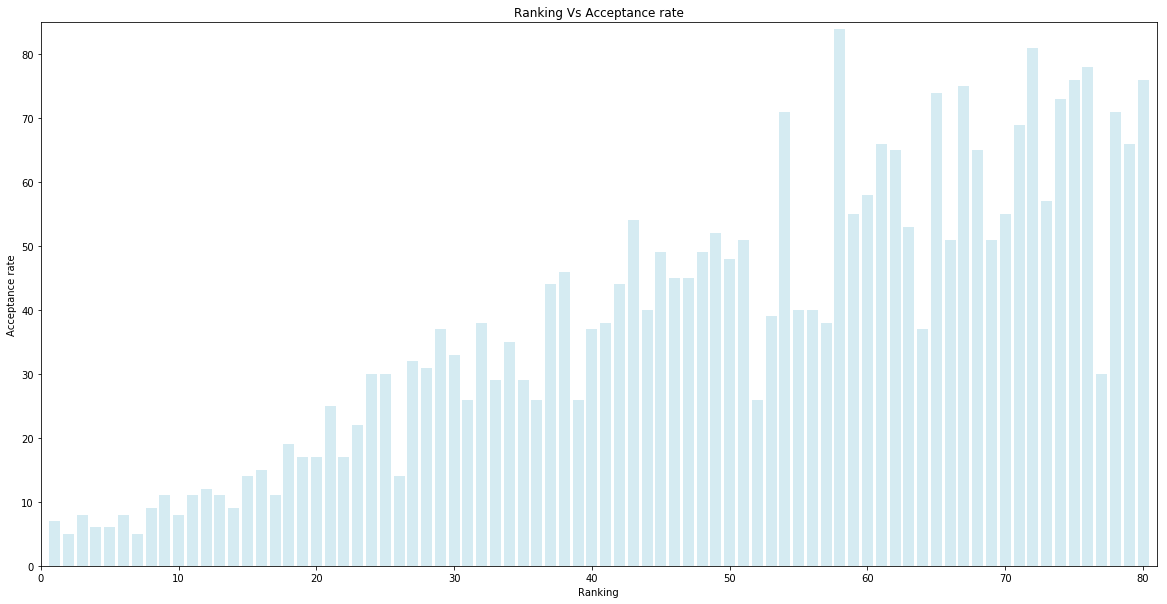

In [19]:
x -merge_df["sequence"]
y = merge_df["acceptance_rate"]
plt.ylim(0,85,5)
plt.xlim(0, 81,10)
plt.bar(x,y,color ='lightblue',alpha =0.5,align="center")
plt.title("Ranking Vs Acceptance rate")
plt.xlabel("Ranking")
plt.ylabel("Acceptance rate")
plt.show

In [23]:
import plotly.graph_objs as go
# set x-axis labels and their corresponding data values
labels = ['End of Q1', 'End of Q2', 'End of Q3', 'End of Q4']
tickvals = ['2016-04-01', '2016-07-01', '2016-10-01', "apple_df_2016.Date.max()"]

x = sat_act_df["sequence"]
y0 = sat_act_df["sat_avg"]
y1 = sat_act_df["act_avg"]
y2 = merge_df["acceptance_rate"]

data=[
    go.Scatter(
        x = x, 
        y= y0, 
        name='SAT', 
        marker=dict(color='#851e52'),
    ),
    go.Scatter(
        x=x, 
        y=y1,
        name='ACT', 
        yaxis='y2',
        mode = 'lines+markers',
        marker=dict(color='#d3560e'),
    ),
    go.Scatter(
        x=x, 
        y=y2,
        name='Acceptance Rate', 
        yaxis='y2',
        mode = 'markers',
        marker=dict(color='#FFBAD2'),
    ),
]

layout = go.Layout(
    title='SAT/ACT Scores Vs. Acceptance Rate based on University Ranking',
    xaxis=go.layout.XAxis(
        ticktext=labels,
        tickvals=tickvals
    ),
    yaxis2= dict(
        overlaying='y',
        side='right',
        showgrid=False,
    )
)
fig = go.Figure(data, layout)

py.iplot(fig, filename='Scores Vs Acceptance Rate')